In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
df=pd.read_csv('G:/Stuff/datasets_20922_26985_Wholesale customers data.csv')

In [3]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
df.shape

(440, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


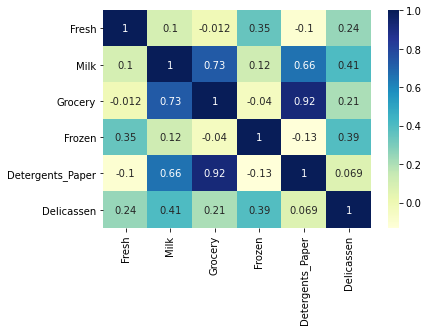

In [54]:
sns.heatmap(df.iloc[:,2:].corr(),annot=True,cmap='YlGnBu')

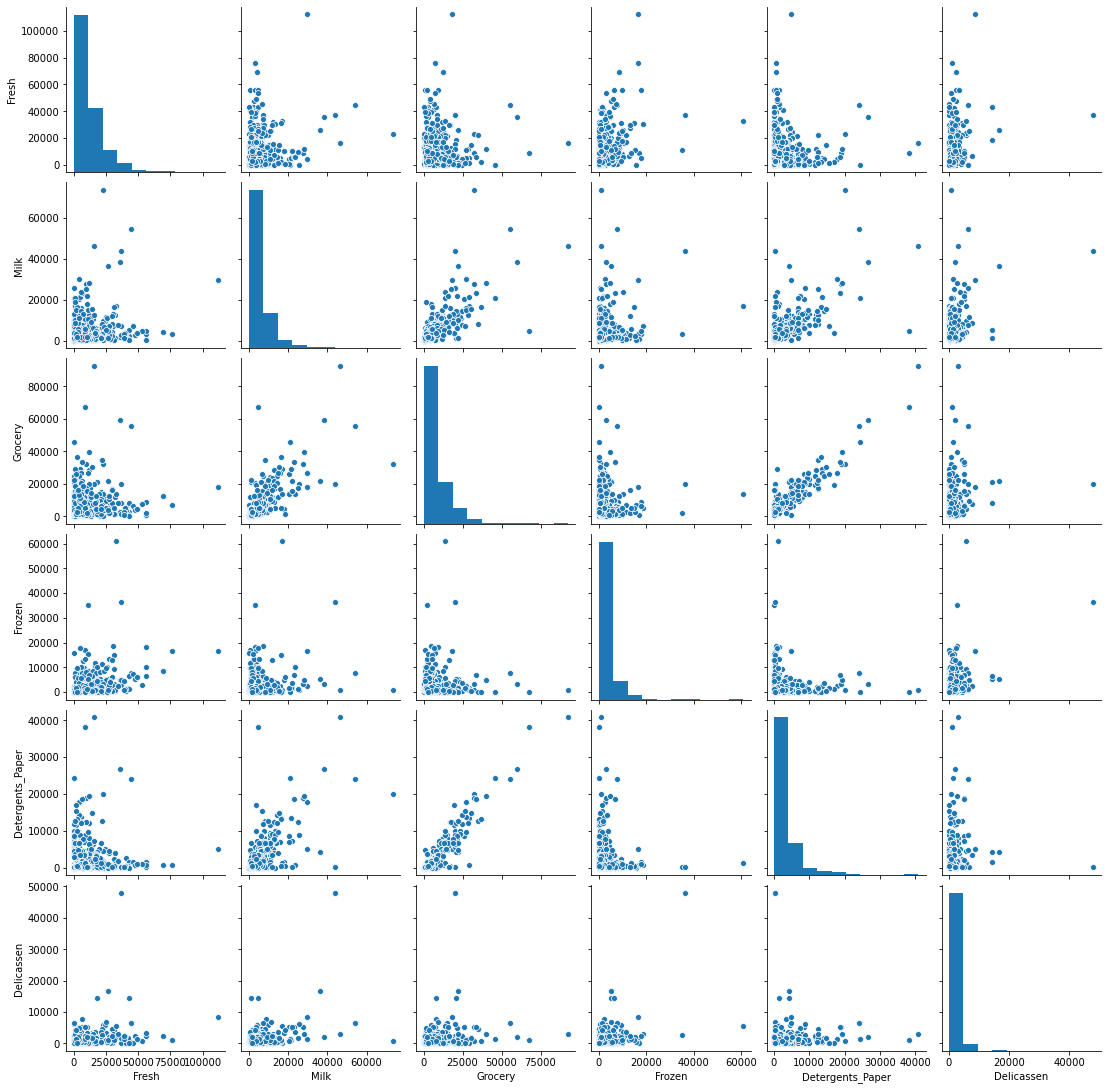

In [55]:
sns.pairplot(df.iloc[:,2:])

In [6]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [56]:
pca_data=PCA(n_components=2).fit_transform(df[['Grocery','Milk','Delicassen','Fresh','Frozen']])
pca_df=pd.DataFrame(pca_data,columns=['pca1','pca2'])

In [57]:
sse=[]
k_value=range(1,11)
for i in k_value:
    km=KMeans(n_clusters=i)
    km.fit(pca_df)
    sse.append(km.inertia_)
print(sse)

[127999434123.4466, 83628414006.94658, 55867500454.41733, 42222739860.27144, 30457069030.14238, 25031454476.38719, 20172945588.79605, 17131646691.608902, 15363444335.305851, 13444940002.316525]


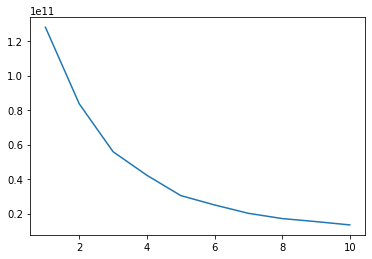

In [58]:
plt.plot(k_value,sse)

In [59]:
km=KMeans(n_clusters=5)
pred_target=km.fit_predict(pca_df)

In [60]:
pca_df['pred_target']=pred_target

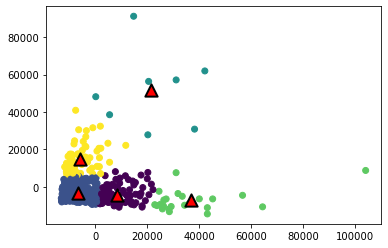

In [61]:
plt.scatter(pca_df.iloc[:,0],pca_df.iloc[:,1],c=pred_target)
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],marker='^',edgecolors='k',c='r',linewidths=2,s=150)

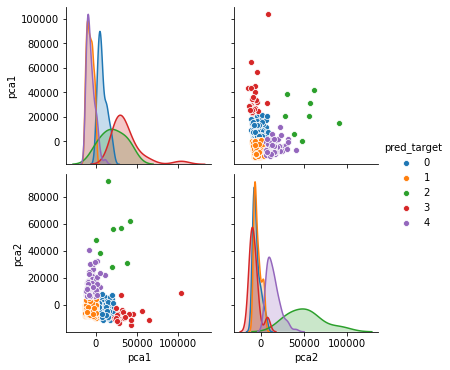

In [62]:
sns.pairplot(pca_df,hue='pred_target')

In [16]:
from sklearn.metrics import silhouette_score

In [63]:
silhouette_score(pca_df,pred_target)

0.4498598512420516

In [64]:
df['pred_target']=pred_target

In [65]:
df['pred_target'].value_counts()

1    233
0    107
4     69
3     23
2      8
Name: pred_target, dtype: int64

In [66]:
df[df['pred_target']==2]['Channel'].value_counts()

2    7
1    1
Name: Channel, dtype: int64

In [67]:
df[df['pred_target']==3]['Channel'].value_counts()

1    21
2     2
Name: Channel, dtype: int64

In [68]:
df[df['pred_target']==4]['Channel'].value_counts()

2    64
1     5
Name: Channel, dtype: int64

In [69]:
df[df['pred_target']==1]['Channel'].value_counts()

1    186
2     47
Name: Channel, dtype: int64

In [70]:
df[df['pred_target']==0]['Channel'].value_counts()

1    85
2    22
Name: Channel, dtype: int64